charge d'exploitation lineique =  2900.0  N/m
====> poutre encastree aux extremites
Nombre de noeuds : 12
Nombre de elements : 11
Fleche maximum =  0.004619803373641376  [en m]
Moment maximum =  4036.437499999991  [en N.m]
Contrainte maximum =  7.973209876543192  [en MPa]

 ===> poutre en rotation aux extremites
Nombre de noeuds : 12
Nombre de elements : 11
Fleche maximum =  0.00804079872151357  [en m]
Moment maximum =  4088.3307955618316  [en N.m]
Contrainte maximum =  8.075715151727074  [en MPa]


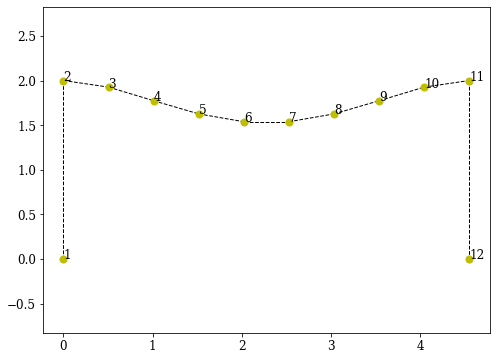

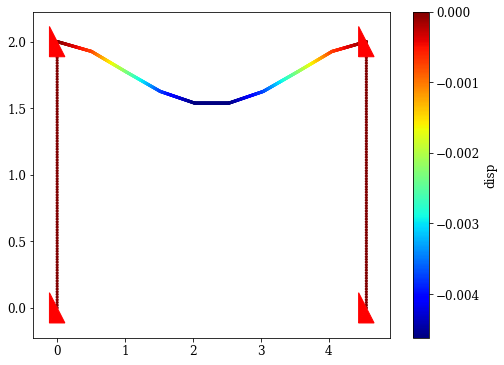

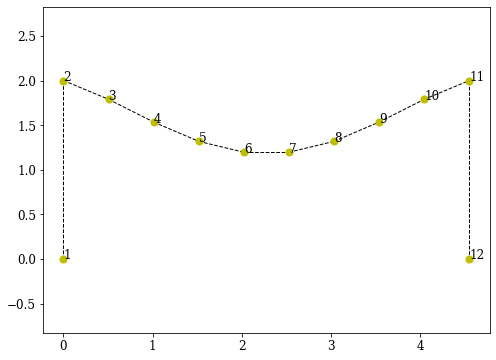

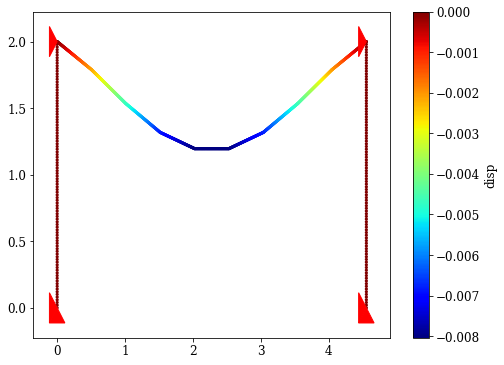

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (8,6)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

# Definitin des parametres du problemes
nb_noeud = 10

E = 12e9 # Module D'Young [en Pa]
rho = 480 # Masse volumique [en kg/m3]
L = 4.55 # Longueur de la poutre [en m]
h = 0.225 # hauteur [en m]
b = 0.060 #largueur [en m]
S = b*h # Section [en m^2]
I = b*h**3/12 # Inertie [en m]
bande_chargement = 1.6
Q = 1500 # charge d'exploitation (en N/m2) cf Eurocode
P = 500
q = P + Q*bande_chargement # Charge repartie (en N/m)
print("charge d'exploitation lineique = ",q," N/m")
scale = 1e2

%run ..\src\Fonctions.ipynb

def K_elem(L_e) :
    K_elem = E*I/L_e**3*np.array([[12, 6*L_e , -12, 6*L_e],
                            [6*L_e, 4*L_e**2 , -6*L_e, 2*L_e**2],
                            [-12, -6*L_e, 12, -6*L_e],
                            [6*L_e, 2*L_e**2 , -6*L_e , 4*L_e**2]])
    return K_elem

afficher = 1
mur = 1
print("====> poutre encastree aux extremites")
bc = 1
U,NL,EL, f_max, M_max,sig_max,BC = solve_flexion(nb_noeud,bc,mur,afficher)
plot_disp_flexion(NL,U,scale)
plot_disp_f(NL,U)
plot_bc(BC)

print("\n ===> poutre en rotation aux extremites")
bc= 2
U,NL,EL, f_max, M_max,sig_max,BC = solve_flexion(nb_noeud,bc,mur,afficher)
plot_disp_flexion(NL,U,scale)
plot_disp_f(NL,U)
plot_bc(BC)

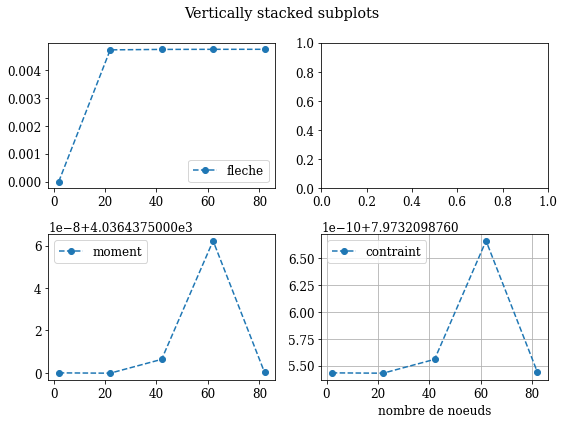

In [2]:
def convergence_fleche(nb_max):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle('Vertically stacked subplots')
    Nb = []
    F = []
    M = []
    S= []
    for i in range(2,nb_max,20) : 
        U,NL,EL, f_max, M_max,sig_max,BC = solve_flexion(i,bc=1,mur=1,afficher = 0)
        Nb.append(i)
        F.append(f_max)
        M.append(M_max)
        S.append(sig_max/1e6)
    axs[0,0].plot(Nb,F,'o--',label="fleche")
    axs[0,0].legend()
    axs[1,0].plot(Nb,M,'o--',label="moment")
    axs[1,0].legend()
    axs[1,1].plot(Nb,S,'o--',label="contraint")
    axs[1,1].legend()
    plt.xlabel("nombre de noeuds")
    plt.grid()
    fig.tight_layout()
    return

convergence_fleche(nb_max=100)

### Résultats analytiques

On peut utiliser la résistance des matériaux pour modéliser une poutre en flexion encastrée à ses deux extremités. 

On obtient une fléche théorique de : 
$$ f_{max} = \frac{qL^4}{76.8EI} $$

Et un moment flechissant maxi mum théorique de :
$$ M_{max} = \frac{ql^2}{8} $$

====> Limites Eurocode 5 :
Etat Limite de service :
fleche maximum :  0.015166666666666667  m
====> poutre encastree aux extremites
f_max =  0.0047360203022595625  m
M_max =  5003.104166666666  N.m
sigma_max =  9.882674897119342  MPa
f_max/f_lim =  0.31226507487425686

 ===> poutre en rotation aux extremites
f_max =  0.02368010151129781  m
M_max =  7504.656249999999  N.m
sigma_max =  14.824012345679009  MPa
f_max/f_lim =  1.5613253743712843


([<matplotlib.axis.XTick at 0x2045a7e4760>,
 [Text(0.125, 0, 'fleche'),
  Text(1.125, 0, 'moment'),
  Text(2.125, 0, 'stress')])

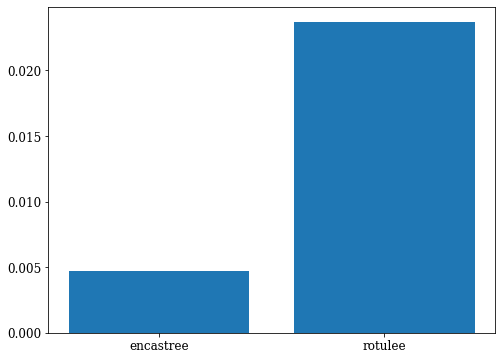

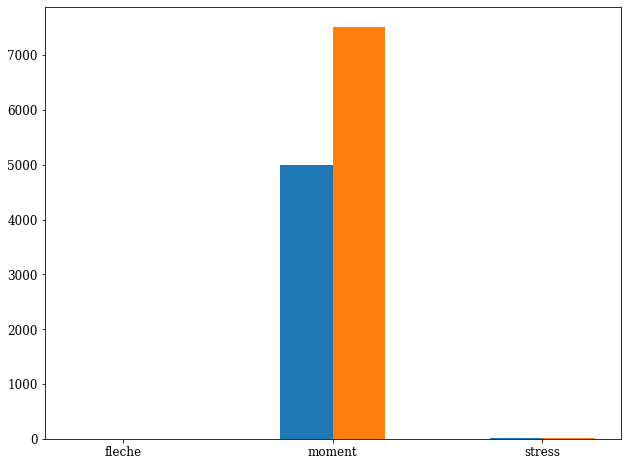

In [3]:
print("====> Limites Eurocode 5 :")
f_lim = L/300
print("Etat Limite de service :")
print("fleche maximum : ",f_lim," m")

print("====> poutre encastree aux extremites")
f1 =  q*L**4/384/E/I
m1 = q*L**2/12
s1 = m1/I*h/2/1e6
print("f_max = ",f1," m")
print("M_max = ", m1, " N.m")
print("sigma_max = ", s1, " MPa" )
print("f_max/f_lim = ", f1/f_lim)
f2 = q*L**4/76.8/E/I
m2 = q*L**2/8
s2 = m2/I*h/2/1e6
print("\n ===> poutre en rotation aux extremites")
print("f_max = ", f2 ," m")
print("M_max = ", m2 , " N.m")
print("sigma_max = ", s2 , " MPa" )
print("f_max/f_lim = ", f2/f_lim)
A1 = [f1,m1,s1]
A2 = [f2,m2,s2]
plt.figure()
plt.bar(['encastree','rotulee'],[f1,f2])

data = [A1,A2]
X = np.arange(len(A1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], width = 0.25)
ax.bar(X + 0.25, data[1], width = 0.25)
plt.xticks([r + 0.25/2 for r in range(len(A1))],
        ['fleche', 'moment', 'stress'])

---

### Sources
- <https://www.youtube.com/watch?v=KfkCBv4Ei_8> Classement visuel du bois
- <https://www.youtube.com/watch?v=7chqQ4mri0M> Classement mécanique du bois
- enstib classement bois : https://www.youtube.com/watch?v=yJVmMlln6zQ
- Mathieu David : Plancher : https://www.youtube.com/watch?v=n0Cghj05aVA
- Cours en ligne de Pierre Latteur : https://www.youtube.com/watch?v=gOL_VRn1Qyk

### Références
[1] [david gibert](https://www.youtube.com/channel/UCOgLXJ-WMJtltTd1rZvCYvg) (vidéo Youtube)

[2] [Calcul sur poutre hyperstatique](http://www.ac-grenoble.fr/lycee/roger.deschaux/documents/Cours/Formulaires/Poutres%20hyperstatiques-Simples.pdf)